# Correlation of mobility to calculated energy demand change

The mobility data clearly shows the impact of lockdown. A strong correlation with the difference between the 
true energy demand and the modelled (without lockdown) energy demand is expected. 

This is done to validate the modelling of the [`energy_forecast` notebook](data/energy_forecast.ipynb). 


In [1]:
# Single include needed
import brsflufight_nerc2 as bff2
from matplotlib import pyplot as plt

## Data extraction

In [2]:
data_sets = bff2.load_data_files()

country = 'United Kingdom'
d_uk = data_sets.get_country(country)

A loading function must be defined in `data_access.default_file_read_functions`.
Success: historical_GHG_Sectors_GCP
Success: historical_GHG_Sectors_PIK
Success: historical_GHG_Sectors_UNFCCC
Success: mobility_apple
Failed: United Kingdom not in mobility_citymapper
Success: mobility_google
Success: uk_energy_daily
Success: uk_energy_demand_reduction


## Data smoothing

Mobility and energy are noisy datasets we smooth other a 14 day period to avoid analysing this noise.

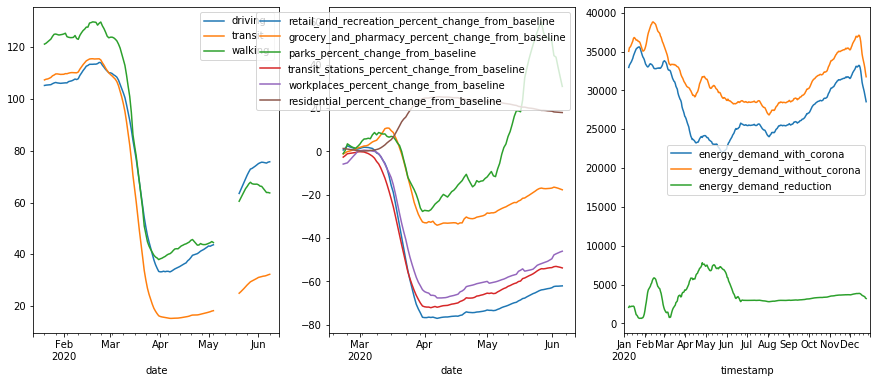

In [3]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15,6)
for i, data_source in enumerate(['mobility_apple', 'mobility_google', 'uk_energy_demand_reduction']):
    d_uk[data_source][data_sets[data_source].data_columns] = \
        d_uk[data_source][data_sets[data_source].data_columns].rolling(14, center=True).mean()
    
    d_uk[data_source][data_sets[data_source].data_columns].plot(ax=axs[i])

## Correlation

In [4]:
to_correlate = {
    'uk_energy_demand_reduction': ['energy_demand_reduction'],  # Carbon power generation
    'mobility_google': data_sets['mobility_google'].data_columns,
    'mobility_apple': data_sets['mobility_apple'].data_columns,

}

correlation_dict = bff2.correlate(
    selector=to_correlate,  # datasets defined above
    data_sets=d_uk,  # UK data
    main_compare='uk_energy_demand_reduction',  # reference dataset, the other are correlated to it
)

Linear regression failed for: 'retail_and_recreation_percent_change_from_baseline' fit to  'energy_demand_reduction':
  Message: Input contains NaN, infinity or a value too large for dtype('float64').
Linear regression failed for: 'grocery_and_pharmacy_percent_change_from_baseline' fit to  'energy_demand_reduction':
  Message: Input contains NaN, infinity or a value too large for dtype('float64').
Linear regression failed for: 'parks_percent_change_from_baseline' fit to  'energy_demand_reduction':
  Message: Input contains NaN, infinity or a value too large for dtype('float64').
Linear regression failed for: 'transit_stations_percent_change_from_baseline' fit to  'energy_demand_reduction':
  Message: Input contains NaN, infinity or a value too large for dtype('float64').
Linear regression failed for: 'workplaces_percent_change_from_baseline' fit to  'energy_demand_reduction':
  Message: Input contains NaN, infinity or a value too large for dtype('float64').
Linear regression failed for

In [5]:
bff2.display_correlations(correlation_dict, display_fun=display)

Pearson correlation coefficients in dataset 'mobility_google'
	 on data from 2020 to 2020 (inclusive)
_________________________________________________________


,energy_demand_reduction
retail_and_recreation_percent_change_from_baseline,-0.557
grocery_and_pharmacy_percent_change_from_baseline,-0.570
parks_percent_change_from_baseline,0.059
transit_stations_percent_change_from_baseline,-0.507
workplaces_percent_change_from_baseline,-0.573
residential_percent_change_from_baseline,0.555



Pearson correlation coefficients in dataset 'mobility_apple'
	 on data from 2020 to 2020 (inclusive)
_________________________________________________________


,energy_demand_reduction
driving,-0.432
transit,-0.493
walking,-0.429


## Outcomes 

These correlation in the range $[-0.429 , -0.570]$ indicates that mobility and energy demand reduction are negatively correlated for the lockdown period. 

This is expected as there was a sharp decrease in mobility as the "energy demand reduction" increases.
